# ECG Signals

This notebook shows a few ECG signals recorded during various cardiac rhythms. The signals presented here are segments from recordings of the MIT-BIH Arrhythmia Database (https://physionet.org/content/mitdb/1.0.0/).

First, we import the required packages and define global constants.

In [5]:
import ipywidgets as widgets
# Enable interactive plots
%matplotlib notebook
%matplotlib widget


import pathlib

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal


DATA_FILE = pathlib.Path("../data/ecg_data.npz")

Then, we load the ECG data and the corresponding cardiac rhythm labels.

In [6]:
def load_data():
    with np.load(DATA_FILE) as data:
        ecg = data["signals"]
        fs = data["fs"].item()
        leads = data["leads"]
        rhythms = data["rhythms"]
        beats = data["beats"]
    beats = [indices[np.isfinite(indices)].astype("int64") for indices in beats]
    return ecg, fs, leads, rhythms, beats


ecg, fs, leads, rhythms, beats = load_data()
time = np.arange(ecg.shape[-1]) / fs

print(f"Sampling frequency: {fs} Hz")
print(f"Number of records : {ecg.shape[0]}")
print(f"Number of leads   : {ecg.shape[1]}")

Sampling frequency: 360 Hz
Number of records : 7
Number of leads   : 2


Finally, we plot the different ECG signals alongside the corresponding interbeat intervals.

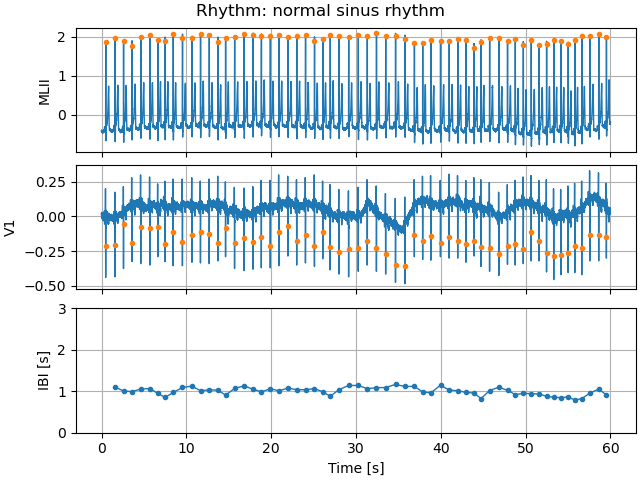

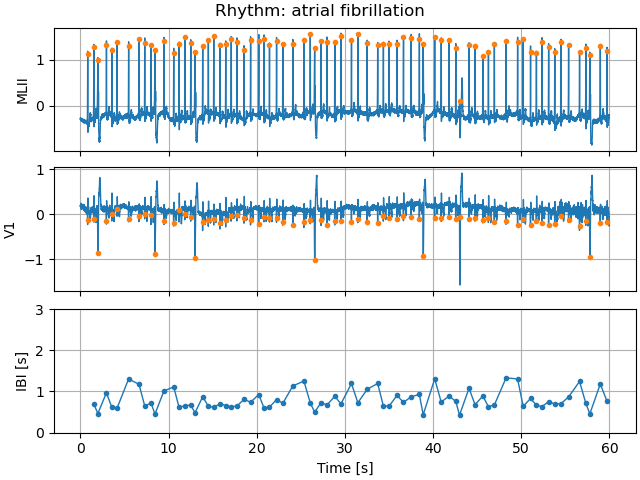

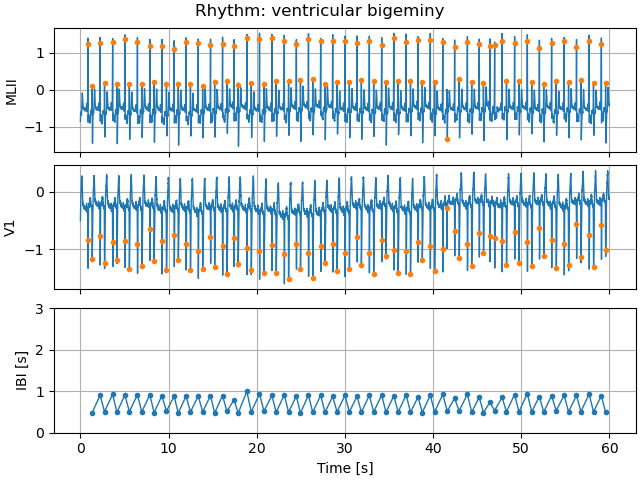

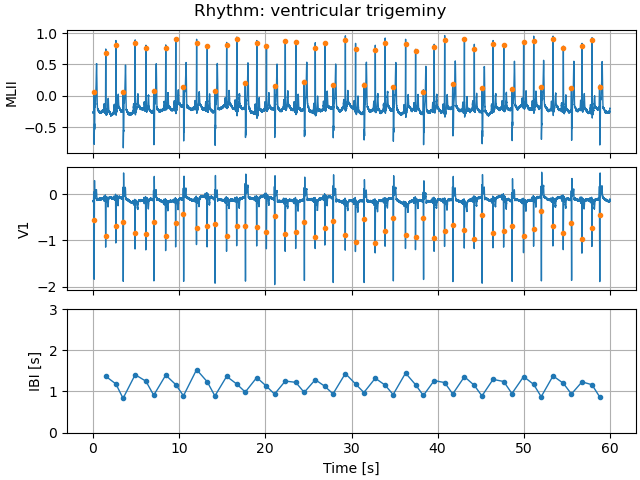

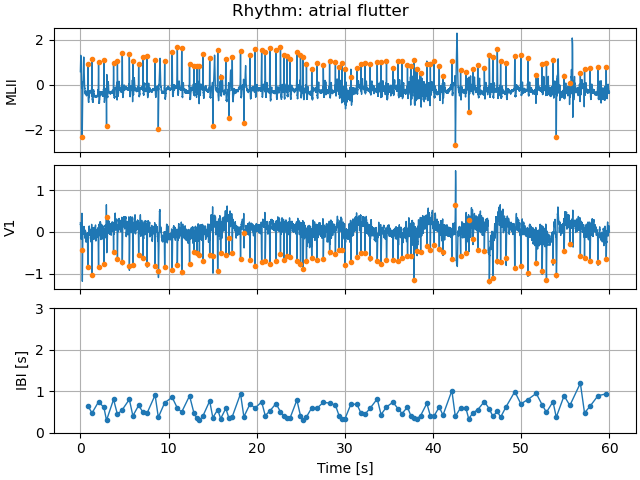

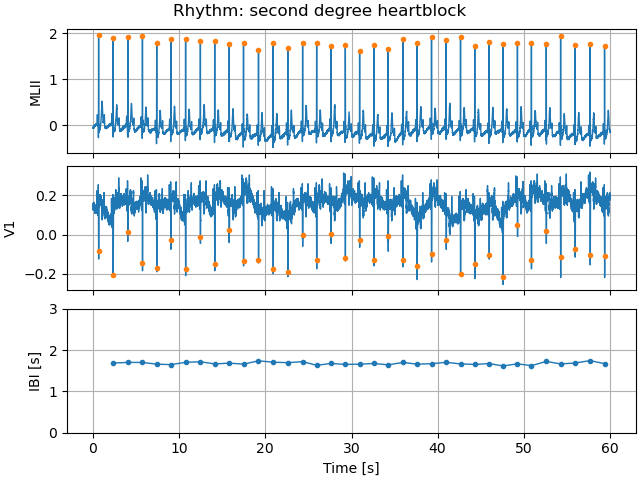

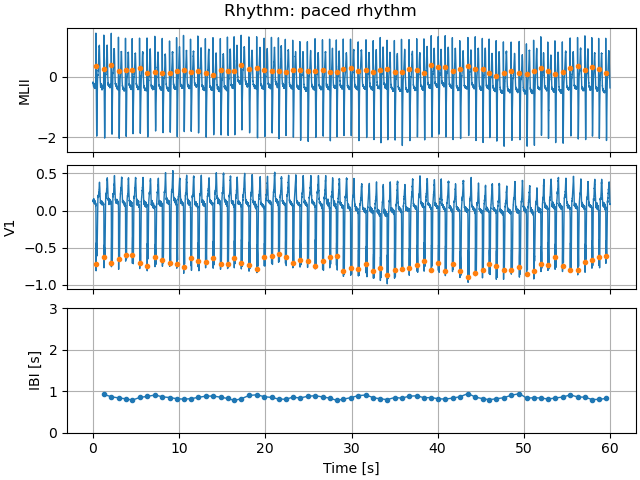

In [7]:
def plot_ecg(time, ecg, beats, leads, rhythm):
    fig, axes = plt.subplots(
        ecg.shape[0] + 1, 1, sharex="all", squeeze=False, constrained_layout=True
    )
    fig.suptitle(f"Rhythm: {rhythm}")
    for i in range(ecg.shape[0]):
        ax = axes.flat[i]
        ax.plot(time, ecg[i], linewidth=1)
        ax.plot(time[beats], ecg[i, beats], ".")
        ax.grid()
        ax.set_ylabel(leads[i])
    ax = axes.flat[-1]
    ax.plot(time[beats[1:]], np.diff(time[beats]), ".-", linewidth=1)
    ax.grid()
    ax.set_ylim(0.0, 3.0)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("IBI [s]")


for i in range(ecg.shape[0]):
    plot_ecg(time, ecg[i], beats[i], leads[i], rhythms[i])

## Question 1

What are the main aspects of each cardiac rhythm in terms of ECG and interbeat intervals? Which features of the signals would be interesting to distinguish the different rhythms?

## Question 2 (optional)

Some ECG signals are noisy. In particular, lead V1 of the normal sinus rhythm example is corrupted by a power line interference at 60 Hz (the dataset was recorded in Boston). In addition, the baseline fluctuates quite a bit in some examples.

Can you reduce these interferences with a digital filter without distorting the ECG signal?

Here are a few SciPy functions to create and apply digital filters:

* [`scipy.signal.firls`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html): FIR filter design using least-squares error minimization.
* [`scipy.signal.firwin`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html): FIR filter design using the window method.
* [`scipy.signal.iirdesign`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html): IIR filter design.
* [`scipy.signal.freqz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html): Compute the frequency response of a filter.
* [`scipy.signal.lfilter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html): Filter a signal with an IIR or FIR filter.
* [`scipy.signal.filtfilt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html): Apply a filter forward and backward to a signal (and avoid distortions caused by IIR filters).

You can get the ECG signal for lead V1 of the normal sinus rhythm example as follows.

```python
x = ecg[0, 1]
```